![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Mathematics/StatisticalReasoning/statistical-reasoning.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

In [1]:
from scripts.uibuttons import *
%uiButtons

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import plotly.offline as py
import plotly.tools as tls
from plotly import graph_objs as go

import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import ipywidgets as widgets
from IPython.display import display, Math, Latex, clear_output, HTML

# These options allow plots to display.
py.init_notebook_mode(connected=True)
fig = plt.Figure()
ax = fig.gca()
canvas = FigureCanvas(fig)

# Introduction

Jerry Sokoloski is a Canadian actor and former basketball player. At 7'4" (2.24 m) he is also Canada's tallest man! 

https://en.wikipedia.org/wiki/Jerry_Sokoloski

![jerry](images/jerry.jpg)
*Jerry Sokoloski walking down the street in Toronto. Photo credit: STAN BEHAL/Toronto Sun.*

Ok, so 7'4" seems really tall, right? What if we want to find out how Jerry - ahem - *measures up* to the rest of the Canadian population of adult men? For that task, we're going to need some more information.

# Background

We can find out just how out*stand*ing Jerry is by comparing his height to thousands of other men's heights. We'll use Python to load in some data made available by the 2016 Center for Disease Control (CDC) National Health Interview Survey.

In [3]:
# Load in the data.
heights = pd.read_csv('https://raw.githubusercontent.com/callysto/data-files/main/Mathematics/StatisticalReasoning/data/menheights.csv')
heights = heights['AHEIGHT']

print('Height data loaded with {} entries.'.format(heights.index[-1]))

Height data loaded with 13890 entries.


As you may have guessed from the Python output, we are going to compare Jerry's height to 13890 other men. We will call the population size $N$, and set $N=13890$. The heights of these men were collected in the United States, but since the average height of Americans can be expected to be the same as the average height of Canadians, we will not worry about this.

Now we'll make a **histogram** of the men's height data. This is done by a process called *binning*. To *bin* the men's heights, we just count up every height within a predetermined interval. For example, we count up every height that is between 60-62 inches (remember, these are American measurements!). After this, count every height between 62-64 inches, and so on.

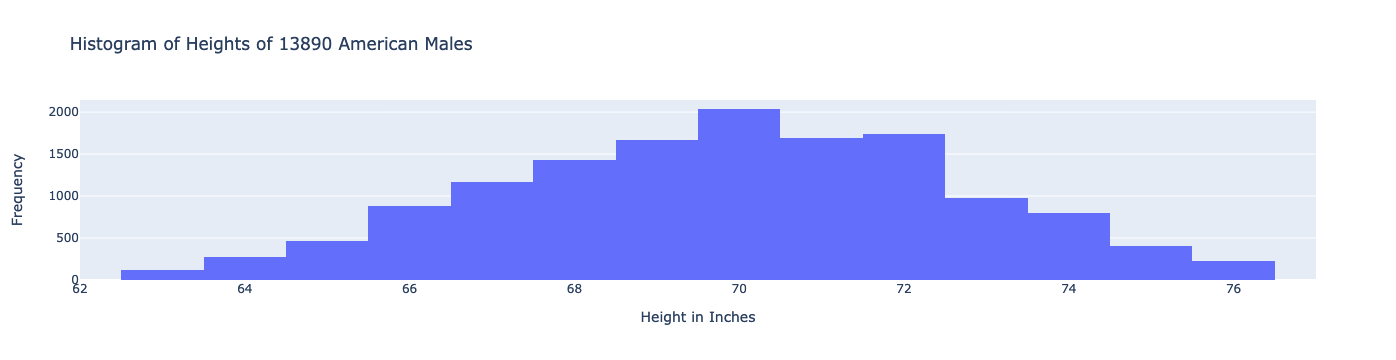

In [4]:
hist_data = [go.Histogram(
                x = heights, 
                visible = True
            )]

layout = dict(
    title = 'Histogram of Heights of {} American Males'.format(heights.index[-1]),
    xaxis = dict(
        range = [np.min(heights)-1,np.max(heights)+1],
        title = 'Height in Inches'
            ),
    yaxis = dict(title = 'Frequency')
        )

fig = dict(data=hist_data, layout=layout)
py.iplot(fig)

The shape of this histogram may not seem very special, but it is! When a histogram has a large bump in the middle and smaller values ('tails') at either end, we say that the dataset is approximately **normally** distributed. When a dataset is **normally** distributed, we can do all kinds of analysis on it.

Let's leave this example for a few minutes to explore a bit more about normal distributions.

## Normal Distributions

You've probably heard the term 'bell curve' at some point. This is *the* normal distribution! It's an idealized model for any normally distributed dataset.

Using the NumPy random module, let's approximate normal distributions by looking at histograms of numbers randomly sampled from a normal distribution. To make things easier to see, we'll only plot the histograms between -4 and 4. 

### *Exercise*
Move the slider to see normally distributed histograms for smaller or larger $N$.

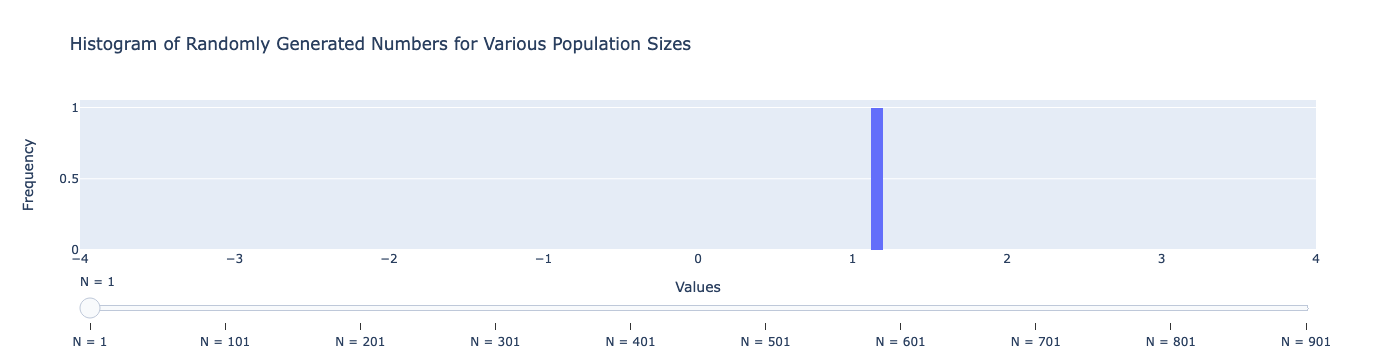

In [5]:
N = 1000

# Array of population sizes.
sizes = list(range(1,N,100))
n = len(sizes)

data = [go.Histogram(
        x = np.random.randn(s),
        histnorm = '',
        xbins = dict(
            start = -4.0,
            end = 4.0,
            size = 0.08
        ),
        visible = False
      ) for s in sizes]

steps = []
for i in range(n):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * n],
        label = 'N = {}'.format(sizes[i])
    )
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(
    active = 0,
    steps = steps
)]

data[0].visible = True

layout = dict(
            title = 'Histogram of Randomly Generated Numbers for Various Population Sizes',
            sliders = sliders,
            xaxis = dict(
                range = [-4,4],
                title = 'Values'
            ),
            yaxis = dict(title = 'Frequency')
            )

fig = dict(data=data, layout=layout)
py.iplot(fig)

<ul>
    <li> What happens to the shape of the distribution as $N$ increases? </li>
    <li> What can you estimate will happen to the shape of the distribution if $N$ is increased even further? </li>
</ul>

### The Mean of a Distribution

Notice the big bump in the middle of the above distributions. We call the value where the top of the bump is located the **mean** of the distribution.

The mean of a normally distributed dataset is usually very close in value to the middle element. It's the average of all of the elements in the dataset. Usually, we use $\mu$ as a symbol for the mean.

### *Question*

What do you think the mean is for any of the above normally distributed datasets?

### Finding the Mean Mathematically

If you want to calculate the mean for a dataset, you need to add up all of the elements and then divide by the number of elements. So, if we have the dataset ${1,2,3,4,5}$, which has 5 elements, the mean is given by
$$
\mu = \frac{1+2+3+4+5}{5} = \frac{15}{5} = 3.
$$

In general, if we have the dataset ${x_1, x_2, x_3, \ldots, x_N}$, where $N$ is the number of elements, then the mean is given by
$$
\mu = \frac{x_1 + x_2 + x_3 + \ldots + x_N}{N} = \frac{\sum_i x_i}{N}.
$$

Notice that we use the symbol $\sum$ as a shortcut to writing the summation of every element in the dataset. We'll spend more time talking about the symbol $x_i$ when we discuss the median.

### The Median and the Mode of a Distribution

There are two others numbers that can help us describe the distribution of a dataset. The first is the **median**, which is easy to find. The median is just the **middle** number of a dataset. The **mode** is even easier, it's just the most frequently occuring value in the dataset.

### *Exercise*

Try to click on the median of the dataset below. The correct median will turn green when clicked.

In [6]:
processing_code = """ 
int siz = 13;

Box[] boxes = new Box[siz];
int[] numbers = new int[siz];
int W = 60;

void setup() {  
  size(900,128);
  background(255);
  strokeWeight(1);

  // Create an array of random integers and sort them.
  for (int i = 0; i < siz; i++){
    numbers[i] = (int)random(1,61);
  }
  numbers = sort(numbers);

  // Now create the boxes and fill them with the random integers.
  for (int i = 0; i < siz; i++){
    if(i == 6){
      boxes[i] = new Box(W + i*W, W/2, W, str(numbers[i]), true);
    }
    else{
      boxes[i] = new Box(W + i*W, W/2, W, str(numbers[i]), false);
    }

  }
}

void draw() {
  for (int i = 0; i < boxes.length; i++){
    boxes[i].display();
  }
}

class Box {
  boolean selected = false;
  boolean median;
  float x, y, w;
  String f;

  Box(float inX, float inY, float inW, String filling, boolean med) {
    x = inX;
    y = inY;
    w = inW;
    f = filling;
    median = med;
  }

  void display() {
    if (selected && median) {
      fill(0, 255, 0);
    }
    else if(selected) {
      fill(255,0,0);
    }
    else {
      fill(255);
    }
    rect(x, y, w, w, 5);
    fill(0);
    textSize(W/2);
    textAlign(CENTER,CENTER);
    text(f,x+w/2,y+w/2);
  }

  boolean clicked() {
    return mouseX > x && mouseX < x+w && mouseY > y && mouseY < y+w;
  }
}

void mousePressed() {
  for (int i = 0; i < boxes.length; i++) {
    if (boxes[i].clicked()) {
      for (int j = 0; j < boxes.length; j++) {
        boxes[j].selected = false;
      }
      boxes[i].selected = true;
      break;
    }
  }
}
"""

html_template = """
<script type="text/javascript" src="scripts/processing.min.js"></script> 
<script type="text/javascript">
  var processingCode = `{}`;
  var myCanvas = document.getElementById("canvas1");
  var jsCode = Processing.compile(processingCode);
  var processingInstance = new Processing(myCanvas, jsCode);
 </script>
<canvas id="canvas1"> </canvas>    
"""

html_code = html_template.format(processing_code)
HTML(html_code)

### Finding the Median Mathematically

There were an odd number of elements in the dataset ($N=13$), so the median was just the middle element. To express the median value mathematically, we need a convenient way to talk about the elements of a dataset. 

We will call the elements in a dataset $x_i$, where $i$ is the location, or *index* of the value. We'll start counting the index at 1. For example, in the dataset 
$$
{1,3,3,4,5,6,11},
$$
we have that $x_1 = 1$, $x_2 = 3$, $x_3 = 3$, and $x_7 = 11$. This dataset has $N=7$ elements, so we could also say that $x_N = 11$. The median is the middle element, $x_4 = 4$.

Now we are in a position to mathematically express the median of a dataset with $N$ an odd number. Therefore, when $N$ is odd, the median of the dataset is
$$
\text{median } = x_{\frac{N+1}{2}}.
$$

So, we look for the median at the $\left(\frac{N+1}{2}\right)^{th}$ index. This is exactly what you did in the last exercise, only you did it by visually finding the middle element. You see a real benefit to using the mathematical expression when $N$ is large. Just imagine trying to look for the middle element when $N=1,000,001$! If you think that's too many, that is a pretty standard size for many datasets.

What if $N$ is even? In that case, we can't find the middle number, because there isn't one! Instead, we take the average of the *two* middle elements. For example, in the dataset
$$
1,3,5,6,7,8,8,10,
$$
the median is the average of $x_4 = 6$ and $x_5 = 7$. In other words, the median is $\frac{6 + 7}{2} = 6.5$. **The median doesn't have to be an element of the dataset**, as we have just shown.

In general, when $N$ is even, the median of the dataset is
$$
\text{median } = \frac{x_{\frac{N}{2}} + x_{\frac{N+1}{2}}}{2}.
$$

### Finding the Mean, Median, and Mode with Technology

Now we'll find the mean, median, and mode of the male height dataset using Python.

In [7]:
mean = np.mean(heights)
median = np.median(heights)
mode = stats.mode(heights, axis = None)

print('Mean: {:.5} inches \nMedian: {} inches \nMode: {} inches, which occurs {} times'.format(mean, median, mode[0][0], mode.count[0]))

Mean: 69.872 inches 
Median: 70.0 inches 
Mode: 70 inches, which occurs 2037 times


So the mean and median are very close in value. The median and the mode have the same value, 70. The mode is 70, and the value of 70 occurs 2037 times in our dataset. So, the most frequently occurring height in our dataset is 70", or 5'10" (1.778 m).

In a normally distributed dataset, the median, mean, and mode should all be approximately equal.

## The Shape of a Distribution: Skewness

Sometimes there are elements in a dataset that can change the shape of the histogram and its underlying distribution. Let's use the heights dataset as an example. Suppose we included the heights of NBA basketball players in the dataset. This would definitely make the value of the mean higher, and might change the value of the median. Similarly, if we including the heights of 9 year old children in the dataset, the mean would be lower and the median might change.

Let's plot the histogram of the heights dataset again and see what happens to the shape of the histogram when children or NBA players are included.

### *Exercise*

Use the drop-down menu to see what happens to the heights histogram when children's heights or NBA heights are included.

/var/folders/rl/6yfxsskj1zq23yylg2zj6z7h0000gn/T/ipykernel_51432/701885472.py:15: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/rl/6yfxsskj1zq23yylg2zj6z7h0000gn/T/ipykernel_51432/701885472.py:16: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



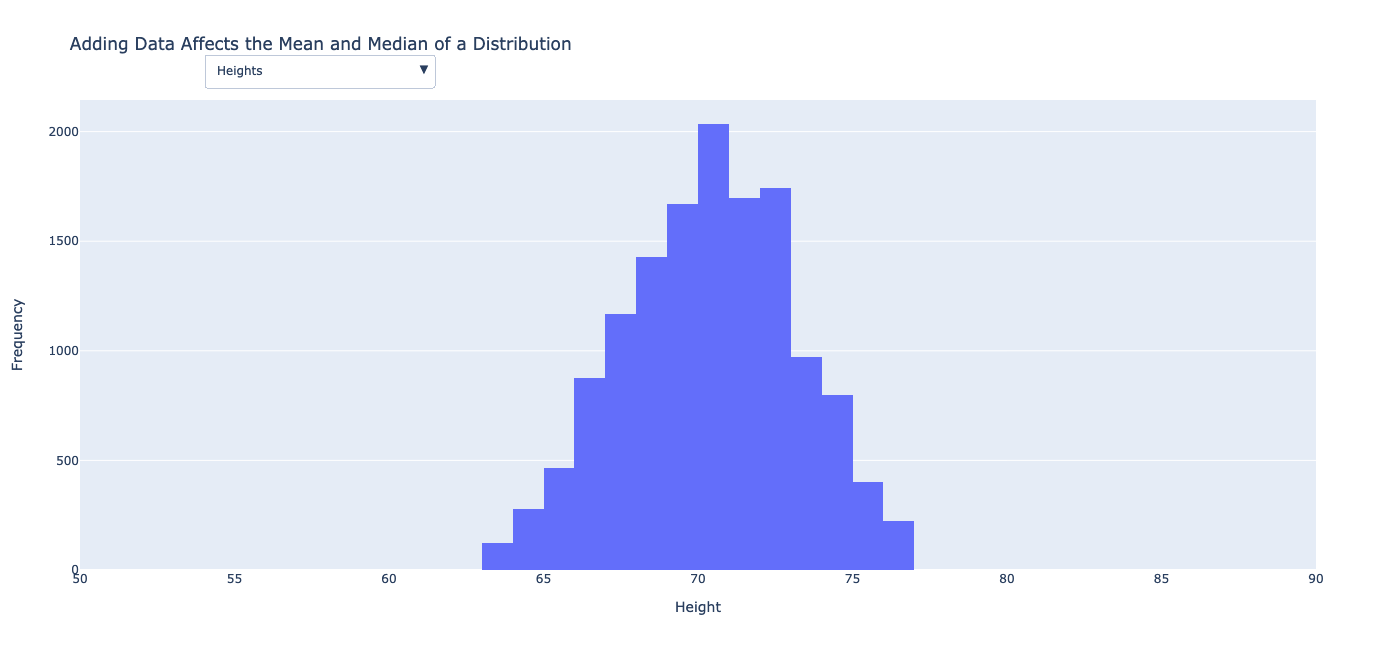

In [8]:
# Read in the NBA height data.
# CHILDheights = pd.read_csv('https://raw.githubusercontent.com/callysto/data-files/main/Mathematics/StatisticalReasoning/data/children_heights.txt', sep='\t')
NBAheights = pd.read_csv('https://raw.githubusercontent.com/callysto/data-files/main/Mathematics/StatisticalReasoning/data/NBAheightsonly.csv',encoding='latin-1')

# Empirically create artificial 9 year-old height data.
CHILDheights = pd.Series(np.random.randint(49,high = np.min(heights),size=(1000,)))

NBAheights = NBAheights.Height
NBAheights.columns = ['AHEIGHT']

# Reset index values for error-free joining.
NBAheights.index = range(len(heights),len(heights) + len(NBAheights))

# Combine the 'heights' dataset with the other datasets.
shortheights = heights.append(CHILDheights)
tallheights = heights.append(NBAheights)

height_histogram = go.Histogram(
    x = heights,
    histnorm = '',
    xbins=dict(
        start=50,
        end=90,
        size=1
    ),
    visible=True,
    name = 'heights'
    )

childheight_histogram = go.Histogram(
    x = shortheights,
    histnorm = '',
    xbins=dict(
        start=50,
        end=90,
        size=1
    ),
    visible=False,
    name = 'child'
)

NBAheight_histogram = go.Histogram(
    x = tallheights,
    histnorm = '',
    xbins=dict(
        start=50,
        end=90,
        size=1
    ),
    visible=False,
    name = 'NBA'
)

data1 = [height_histogram, childheight_histogram, NBAheight_histogram]

button_layer_1_height = 1.12
button_layer_2_height = 1.065

layout = go.Layout(
    title = 'Adding Data Affects the Mean and Median of a Distribution',
    width=800,
    height=650,
    autosize=False,
    xaxis = dict(
        title = 'Height',
        range = [50,90]
    ),
    yaxis = dict(title = 'Frequency')
)

height_annotations=[
    dict(text='Dataset', x=0, y=1.1, yref='paper', align='left', showarrow=False),
    dict(
        x=85,
        y=1000,
        xref='x', yref='y',
        text='Mean: {:.5}'.format(np.mean(heights)),
        showarrow = False
    ),
    dict(
        x=85,
        y=800,
        xref='x', yref='y',
       text='Median: {:.5}'.format(np.median(heights)),
       showarrow = False
    )]

child_annotations=[
    dict(text='Dataset', x=0, y=1.1, yref='paper', align='left', showarrow=False),
    dict(
        x=85,
        y=1000,
        xref='x', yref='y',
        text='Mean: {:.5}'.format(np.mean(shortheights)),
        showarrow = False
    ),
    dict(
        x=85,
        y=800,
        xref='x', yref='y',
       text='Median: {:.5}'.format(np.median(shortheights)),
       showarrow = False
    )]

NBA_annotations=[
    dict(text='Dataset', x=0, y=1.1, yref='paper', align='left', showarrow=False),
    dict(
        x=85,
        y=1000,
        xref='x', yref='y',
        text='Mean: {:.5}'.format(np.mean(tallheights)),
        showarrow = False
    ),
    dict(
        x=85,
        y=800,
        xref='x', yref='y',
       text='Median: {:.5}'.format(np.median(tallheights)),
       showarrow = False
    )]

updatemenus=list([
    dict(
        active=0,
        buttons=list([
            dict(
                args=[{'visible': [True, False, False]},{'annotations': height_annotations}],
                label='Heights',
                method='update'
            ),
            dict(
                args=[{'visible': [False, True, False]},{'annotations': child_annotations}],
                label="Heights with children's heights",
                method='update'
            ),
            dict(
                args=[{'visible': [False, False, True]},{'annotations': NBA_annotations}],
                label='Heights with NBA heights',
                method='update'
            )                     
        ]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.1,
        xanchor = 'left',
        y = button_layer_1_height,
        yanchor = 'top'            
    )
])

annotations = list([
    dict(text='Dataset', x=0, y=1.1, yref='paper', align='left', showarrow=False )
])
layout['updatemenus'] = updatemenus

fig = dict(data=data1, layout=layout)
py.iplot(fig)

<ul> 
    <li> What happens to the median as the children's or NBA heights are included in the histogram? </li>
    <li> When a statistic doesn't change based on different input we say it is **stable**. Is the median stable? Is the mean? </li>
</ul>

Adding in the children's heights made the big bump in the histogram shift to the right. The children's heights also caused the mean to decrease but the median to stay the same. When a distribution has its bump shifted to the right like this, we say that the distribution is **skewed left**, **left-skewed**, or **negatively skewed**.

When we added the NBA heights, the big bump in the middle shifted to the left. The NBA heights caused the mean to increase but the median to stay the same.  When a distribution has its bump shifted to the left like this, we say that the distribution is **skewed right**, **right-skewed**, or **positively skewed**.

Leaving out both the children's heights and the NBA heights, the distribution looks roughly **symmetric**. This means that the distribution is not skewed left or right, but looks roughly as you look away from the middle bump in either direction.

In general, we have the following:
<ul>
    <li> If the median is higher than the mean, the distribution is <b>skewed right</b>. </li>
    <li> If the mean is higher than the median, the distribution is <b>skewed left</b>. </li>
    <li> If the median and the mean are approximately equal, the distribution is <b>symmetric</b>. </li>
</ul>

### Outliers

Sometimes, if there are only a few data elements at either end of the histogram, the data elements causing the skewness might be **outliers**. An **outlier** is a data element that could be present for a number of reasons, such as a mistake when recording the data, misreading the data, or an extremely rare observation.

## The Shape of a Distribution: Standard Deviation

The mean, median, and mode are good indicators of how normal a distribution or dataset might be, but they don't tell us the whole story. If we want to know about how spread out the elements of a dataset are, then we need a new statistic. The standard deviation of a dataset, written as $\sigma$, is the measurement of how much the elements of the dataset vary as a group. In other words, how spread out the histogram is.

### *Exercise*

Move the slider below to see how different standard deviations affect the shape of the normal distribution.

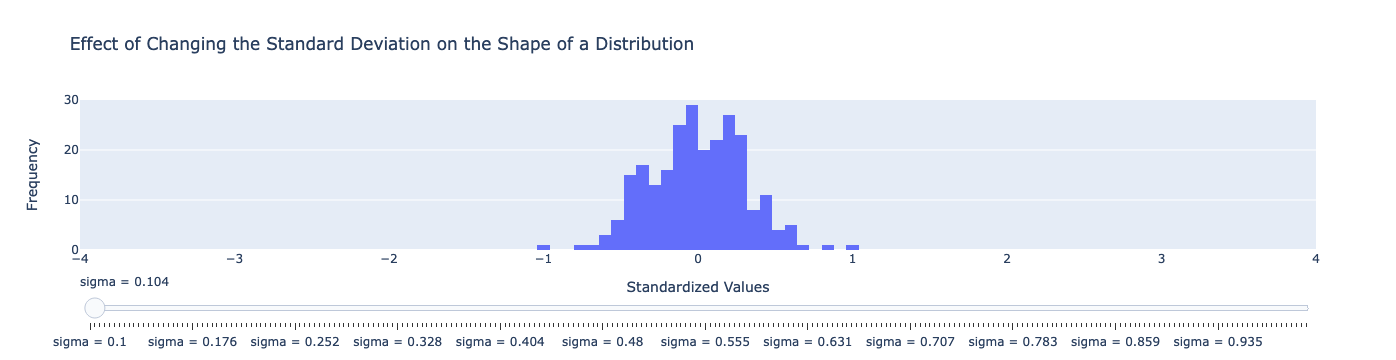

In [9]:
N = 250

# Array of standard deviations and random dataset.
sigmas = np.linspace(0.1,1,N)
randoms = np.random.randn(N)

data = [go.Histogram(x = np.sqrt(s)*randoms,
        histnorm = '',
        xbins=dict(
            start=-4.0,
            end=4.0,
            size=0.08
        ),
        visible=False
      ) for s in sigmas]

steps = []
for i in range(N):
    step = dict(
        method='restyle',
        args=['visible', [False] * N],
        label='sigma = {:.3}'.format(sigmas[i])
    )
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(
    active=1,
    steps=steps
)]

layout = dict(
        title = 'Effect of Changing the Standard Deviation on the Shape of a Distribution',
        sliders=sliders, 
        xaxis = dict(
            range = [-4,4],
            title = 'Standardized Values'
        ),
        yaxis = dict(
            range = [0,30],
            title = 'Frequency'
        )
    )

data[0].visible = True

fig = dict(data=data, layout=layout)
py.iplot(fig)

<ul> 
    <li> What happens to the spread of the histogram when $\sigma$ is small? </li>
    <li> What happens to the spread of the histogram when $\sigma$ is large? </li>
    <li> What can you estimate will happen for very small or very large values of $\sigma$? </li>
</ul>

### Back to Jerry Sokoloski

Using the standard deviation, we can also find out how far a single data element is from the rest of the dataset. We're going to use the standard deviation ($\sigma$) of the heights dataset to find out exactly how different Mr. Sokoloksi's height is from the population. First, we'll use a line of code to find the value of $\sigma$ for the heights dataset.

In [10]:
sigma = np.std(heights)

print('The standard deviation of the Heights dataset is {:.4} inches.'.format(sigma))

The standard deviation of the Heights dataset is 2.787 inches.


One more thing about the standard normal distribution: we can expect that a certain proportion of elements will be within a given distance from the mean. These distances are given by $\sigma$. Look at the graphic below to see the proportion of elements within $\sigma$, $2\sigma$, and $3\sigma$ of the mean.

![normal](images/normaldist.png)
*LaTeX code adapted from John Canning: http://johncanning.net/wp/?p=1202.*

This graphic shows that 68% of the values in a normally distributed dataset will be at most a distance of $\sigma$, or one standard deviation, from the mean. It also shows that 95% of the data should be within 2$\sigma$ (2 standard deviations) of the mean, and that 99.7% of the data should be within 3$\sigma$ (3 standard deviations) of the mean. This is often called the **68-95-99.7 rule**. 

The 68-95-99.7 rule can also be seen as the area under the curve that defines the normal distribution. 100% of the elements in a normally distributed dataset will be under the curve. We then have 

<ul>
    <li> 68% of the data elements represent the area under the normal curve between $-\sigma$ and $\sigma$, </li>
    <li> 95% of the data elements represent the area under the normal curve between $-2\sigma$ and $2\sigma$, and </li>
    <li> 99.7% of the data elements represent the area under the normal curve between $-3\sigma$ and $3\sigma$. </li>
</ul>

What this means in context of our example is that we expect 68% of all men's heights to be within $\sigma = 2.787$ of the mean. Remember, the mean of our dataset was $\mu = 69.872$. 

Therefore, 
<ul>
    <li>68% of Canadian men should have a height between $69.872 - 2.787 = 67.085$ inches and $69.872 + 2.787 = 72.659$ inches, </li>
    <li>95% of Canadian men should have a height between $69.872 - 2\times2.787 = 64.298$ inches and $69.872 + 2\times2.787 = 75.446$ inches, and</li>
    <li>99.7% of Canadian men should have a height between $69.872 - 3\times2.787 = 61.511$ inches and $69.872 + 3\times2.787 = 78.233$ inches. </li>
</ul>

For example, a height of 79 inches (6'7" or 2.01 m) is over 3 standard deviations higher than the mean. Since 99.7% of the population should be *within* 3 standard deviations of the mean, we can subtract 100-99.7 to see that 0.3% of male heights should be 3$\sigma$ below the mean **and** 3$\sigma$ above the mean. This can be a hard concept to understand, so let's look at a picture.

![normal](images/tailsdist.png)

From the picture above, we see that about 0.3% of elements in a normally distributed dataset will be either 3$\sigma$ *below* the mean or 3$\sigma$ *above* the mean. Since 79 inches is more than 3$\sigma$ above the mean, we can say that his height is somewhere in the top 0.15 % of male heights in Canada. 

We got the number 0.15 %; by dividing 0.3 %; in half, since we only were looking at the heights in the region 3$\sigma$ above the mean.

## Comparing Apples and Oranges: Z-Scores

Canadian Tire is a well-known retailer with stores across Canada. In November of 2014, Canadian Tire stock prices jumped from 198.80 dollars to 240.00 dollars, a substantial increase of &dollar;41.20, or almost 21&percnt;! For any investor, a 21&percnt; increase would be extremely welcome and rare.

So what's more exceptional, Jerry Sokoloski's height or Canadian Tire's stock jump in 2014? We can check this by **standardizing** the datasets using a **z-score**.

The **z-score** of a data element is found by subtracting the mean from the element and dividing by the standard deviation. In other words, the z-score of the element $x$ is given by
$$
z = \frac{x - \mu}{\sigma}.
$$

The **z-score** is a way of locating a standardized data element on the idealized normal distribution for a normally distributed dataset.

We will use Python to calculate the z-scores of the heights dataset.

In [11]:
z_heights = (heights - mean)/sigma

print('Standardized Heights dataset with: \nmean = {:.5} inches \nstandard deviation = {:.4} inches'.format(mean,sigma))
print(z_heights)

Standardized Heights dataset with: 
mean = 69.872 inches 
standard deviation = 2.787 inches
0       -2.465759
1       -2.465759
2       -2.465759
3       -2.465759
4       -2.465759
           ...   
13886    2.198996
13887    2.198996
13888    2.198996
13889    2.198996
13890    2.198996
Name: AHEIGHT, Length: 13891, dtype: float64


Standardizing a normally distributed dataset converts the data elements to their corresponding locations on the idealized bell curve, and gives the standardized dataset a mean of 0 and standard deviation of 1.

Now we'll load in the Canadian Tire stock dataset, standardize it, and plot the histogram.

Canadian Tire dataset loaded with 145 entries.
Canadian Tire gain data standardized.


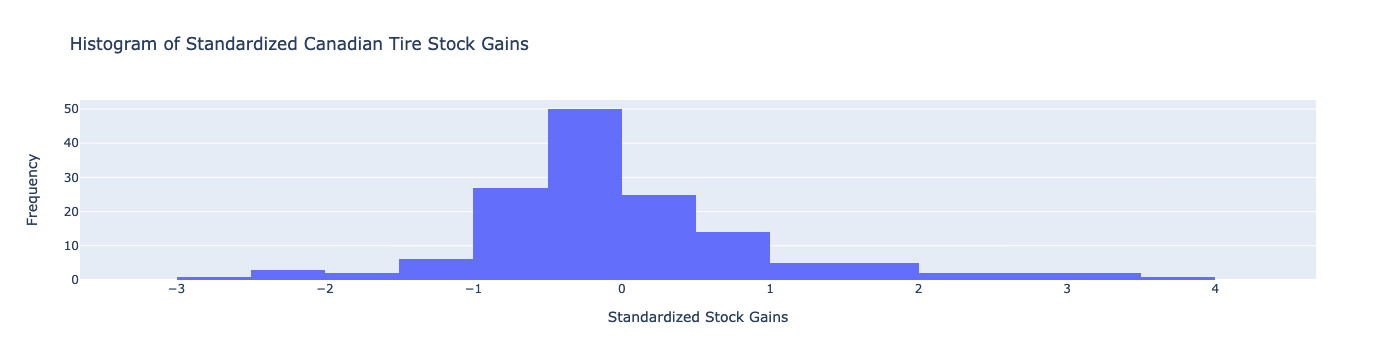

In [12]:
# Read in the Canadian Tire financial data.
cantire = pd.read_csv('https://raw.githubusercontent.com/callysto/data-files/main/Mathematics/StatisticalReasoning/data/canadiantire.txt', sep = '\t')

# Gains are the closing stock value minus the opening stock value.
gain = cantire.Close - cantire.Open

# We'll remove the highest stock gain for this example.
high_gain = gain.max()
gain = gain[gain < high_gain]

# Standardize the dataset.
z_gain = (gain - np.mean(gain))/np.std(gain)

print('Canadian Tire dataset loaded with {} entries.'.format(len(z_gain)))
print('Canadian Tire gain data standardized.')

# Plot the histogram.
hist_data1 = [go.Histogram(
                x = z_gain, 
                visible = True
            )]

layout1 = dict(
    xaxis = dict(
        range = [np.min(z_gain)-1,np.max(z_gain)+1],
        title = 'Standardized Stock Gains'
            ),
    yaxis = dict(
        title = 'Frequency'
        ),
    title='Histogram of Standardized Canadian Tire Stock Gains'
        )

fig = dict(data=hist_data1, layout=layout1)
py.iplot(fig)

It looks like the Canadian Tire stock dataset is roughly normally distributed.

Now we'll compare Mr. Sokoloski's height to the greatest Canadian Tire stock value jump. Here is where z-scores really shine: *the units don't matter!* Remember, our heights dataset had inches as the unit of measurement. The stock dataset uses stock prices as units. When we standardize both datasets, the units are cancelled and we are left with *dimensionless* numbers.

Another benefit to using z-scores is that they enable us to determine the distance a particular data element is from the mean. We can sometimes use the 68-95-99.7 rule to find out the proportion of the dataset with values above or below the value of the data element.

Let's find the z-scores for Jerry Sokoloski's height and the biggest stock value increase.

In [13]:
# Standardizing Jerry's height.
z_jerry = (88 - np.mean(heights))/np.std(heights)

# Standardizing the height of the tallest spruce.
z_gain = (high_gain - np.mean(gain))/np.std(gain)

print("The z-score for Jerry's height is {:.5}.".format(z_jerry))
print("The z-score for the Canadian Tire stock gain is {:.5}.".format(z_gain))

The z-score for Jerry's height is 6.5049.
The z-score for the Canadian Tire stock gain is 5.2857.


These z-scores tell us how many standard deviations each standardized value is from the mean of the idealized normal distribution. Jerry's height is 6.5049 standard deviations above the mean, and the Canadian Tire stock jump is 5.2857 standard deviations above the mean.

This tells us that Jerry's height is more exceptional and rare than the Canadian Tire stock jump, though both are very exceptional. It's difficult to use the 68-95-99.7 rule here, because neither z-score is exactly 1, 2, or 3 standard deviations from the mean. However, Python has a function for finding the proportion of the population below or above z-scores that lie in between standard deviations.

We call the probability of the location of a z-score its **p-value**.

In [14]:
# Calculate p-values for Jerry and Canadian Tire z-scores.
p_jerry = 1 - stats.norm.cdf(z_jerry, 0, 1)   # Subtract the proportion below z_jerry from 1 = 100%
p_gain = 1 - stats.norm.cdf(z_gain, 0, 1)     # Subtract the proportion below z_gain from 1 = 100%

print("The probability of observing Jerry's height in the population is {:.6} %.".format(p_jerry*100))
print("The probability of observing the Canadian Tire stock jump is {:.6} %.".format(p_gain*100))

The probability of observing Jerry's height in the population is 3.88667e-09 %.
The probability of observing the Canadian Tire stock jump is 6.26168e-06 %.


Again, we see that it is far less likely to observe Jerry's height (a 0.0000000039% probability) than to observe the Canadian Tire stock jump (a 0.0000063% probability).

# Summary

When given a dataset, we can check if it is normally distributed by:
<ul>
    <li> visually checking its plotted histogram or </li>
    <li> calculating and comparing the mean, the median, and the mode. </li>
</ul>

The median and the mean can tell us if the distribution is skewed left or right, which may indicate outliers in the dataset.

Examining the shape of the histogram can tell us about the skewness of the underlying distribution, and may indicate that we have outliers in the dataset. The standard deviation tells us about the spread of the data.

We can compare two different normally distributed datasets by standardizing both datasets. This transforms the distribution for both datasets into the idealized normal distribution. Once we have the datasets in terms of the normal distribution, we can find the probability of observing a given data element by either the 68-95-99.7 rule or using technology such as Python.

# *Exercises*
<ol>
    <li> Facebook stock prices change over time, depending on many factors. Below is a plot of the histogram of Facebook stock gains between the years of 2013-2018. Look at the histogram to check if this dataset is normally distributed. </li>
</ol>

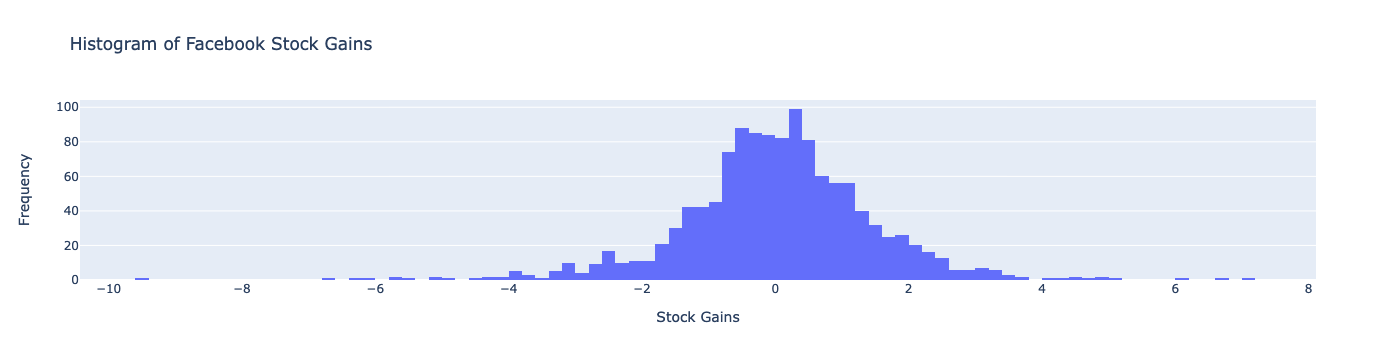

In [15]:
# load in the data.
facebook = pd.read_csv('https://raw.githubusercontent.com/callysto/data-files/main/Mathematics/StatisticalReasoning/data/facebook.csv')

# Select the difference between opening price and closing price: the 'Gain'.
facebook = facebook.Gain

# Plot the histogram.
fb_data = [go.Histogram(
            x = facebook,
            visible = True
)]

layout = dict(
    title = 'Histogram of Facebook Stock Gains',
    xaxis = dict(
        range = [np.min(facebook)-1,np.max(facebook)+1],
        title = 'Stock Gains'
            ),
    yaxis = dict(
        title = 'Frequency'
            )
        )

fig = dict(data = fb_data, layout = layout)
py.iplot(fig)

In [16]:
from ipywidgets import interact_manual, widgets, Layout
      
@interact_manual(answer = widgets.Select(
    options = ['not normally distributed.', 'normally distributed.'],
    value = None,
    rows = 2,
    description = 'The data is: ',
    disabled=False
))
def get_answer_one(answer):
    if answer == 'normally distributed.':
        print('Correct!')
    else:
        print('Look again at the shape of the histogram. Does it look at all like a bell?') 
        
# Change default 'Run Interact' button text.
get_answer_one.widget.children[1].description = 'Check Answer'

interactive(children=(Select(description='The data is: ', options=('not normally distributed.', 'normally dist…

<ol start='2'>
    <li> Look at the calculated mean, median, and mode for the Facebook dataset. What do these numbers tell you about the distribution of the data? </li>
</ol>

In [17]:
fb_mean = np.mean(facebook)
fb_median = np.median(facebook)
fb_mode = stats.mode(facebook, axis = None)

print('Mean: ${} \nMedian: ${}\nMode: ${}'.format(fb_mean, fb_median, fb_mode[0][0]))

Mean: $0.02241462509928514 
Median: $0.039994
Mode: $-0.470001


In [18]:
@interact_manual(answer = widgets.Select(
    options = ['normally distributed.', 'not normally distributed.'],
    value = None,
    rows = 2,
    description = 'The data is: ',
    disabled=False
))
def get_answer_two(answer):
    if answer == 'normally distributed.':
        print('Correct!')
    else:
        print('Look again at the mean and median. Are they close in value or are they very different?') 

# Change default 'Run Interact' button text.
get_answer_two.widget.children[1].description = 'Check Answer'

interactive(children=(Select(description='The data is: ', options=('normally distributed.', 'not normally dist…

<ol start = '3'>
    <li> The standard deviation for the Facebook dataset is displayed below. The largest loss in Facebook stock prices during the years 2013-2018 was a drop of \$9.43 on 8 February 2018. Calculate the z-score for this loss by using the formula $z=\frac{x - \mu}{\sigma}$. </li>
</ol>

In [19]:
fb_stdev = np.std(facebook)
print('The standard deviation for the Facebook data is {}.'.format(fb_stdev))

# (9.43 - fb_mean)/fb_stdev

The standard deviation for the Facebook data is 1.4879478951470493.


In [20]:
@interact_manual(answer = widgets.BoundedFloatText(
    value=0,
    min=0,
    max=10.0,
    step=0.0000000000000001,
    description='z-score:',
    disabled=False
))
def get_answer_three(answer):
    if 6.3 <= answer <= (9.43-fb_mean)/np.std(facebook):
        print('Correct!')
    else:
        print('Check your algebra carefully, and try rounding to 3 digits.') 
        
# Change default 'Run Interact' button text.
get_answer_three.widget.children[1].description = 'Check Answer'

interactive(children=(BoundedFloatText(value=0.0, description='z-score:', max=10.0, step=1e-16), Button(descri…

<ol start = '4'>
    <li> By examining the z-score that you just calculated for the largest stock drop, determine if this loss is more exceptional than Jerry Sokoloski's height by using the p-value calculator below. <br><b>Hint:</b> Jerry's z-score was 6.5049. </li>
</ol>

In [21]:
style = {'description_width': 'initial'}

@interact_manual(answer = widgets.FloatText(
    value=0,
    description='Facebook z-score:',
    style = style,
    disabled=False
))
def calculate_answer_four(answer):
    p = 1 - stats.norm.cdf(answer, 0, 1)
    print('The probability of observing the Facebook stock drop of {} is {}%'.format(answer, p*100))
    
# Change default 'Run Interact' button text.
calculate_answer_four.widget.children[1].description = 'Calculate p-value'

@interact_manual(answer = widgets.Select(
    options = ["less exceptional than Jerry's height.", "more exceptional than Jerry's height."],
    description = 'Based on the above p-value, the Facebook stock drop is ',
    value = None,
    disabled=False,
    style=style,
    layout=Layout(width='75%', height='80px')
))
def answer_fourb(answer):
    if answer == "less exceptional than Jerry's height.":
        print("Yes!")
    else:
        print("Try again, checking that you got the right z-score in question 3.")

# Change default 'Run Interact' button text.
answer_fourb.widget.children[1].description = 'Check Answer'

interactive(children=(FloatText(value=0.0, description='Facebook z-score:', style=DescriptionStyle(description…

interactive(children=(Select(description='Based on the above p-value, the Facebook stock drop is ', layout=Lay…

# *Wisdom of the Crowd*

For this exercise, we'll take turns guessing at the number of jelly beans in the supplied container!

Though any single guess is unlikely to get the number exactly right, when a large group of people take individual guesses, the distribution of their guesses can get surprisingly close to the true answer! This is known as the "Wisdom of the Crowd".

We'll try that here by allowing everyone in the class to enter their guess in the supplied spreadsheet and plot everyone's guesses:

In [ ]:
# Read from Google Sheet
spreadsheet_key = '116_Eqh_urkADXFegJuIEvQRr6syQKo3K8hFfryGUDWA'
spreadsheet_gid = '0'
csv_link = f'https://docs.google.com/spreadsheets/d/{spreadsheet_key}/export?gid={spreadsheet_gid}&format=csv'
jbGuesses = pd.read_csv(csv_link)

# Plot
layout = dict(
    title = 'Distribution of Jellybeans',
    xaxis = dict(
        title = 'Number of Jellybeans'
            ),
    yaxis = dict(
        title = 'Frequency'
            )
)
fig = go.Figure(data=[go.Histogram(x=jbGuesses['Enter your guesses below, please do not delete any other guesses!!!'])],
                layout=layout
                )

fig.show()

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)